In [41]:
#Dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import requests 
import json
from matplotlib import pyplot as plt

#Import the API Key
from api_keys import google_api

In [2]:
#Shopping Birks
base_url="https://serpapi.com/search"

params = {"engine": "google_shopping",
          "q": "Birkenstocks",
          "api_key": google_api}
# Run request
response= requests.get(base_url, params=params)
resp_data = response.json()
# Print the json (pretty printed)
print(json.dumps(resp_data, indent=4, sort_keys=False))

{
    "search_metadata": {
        "id": "643058a81baebbb07c2effa5",
        "status": "Success",
        "json_endpoint": "https://serpapi.com/searches/a8a592261bf1d723/643058a81baebbb07c2effa5.json",
        "created_at": "2023-04-07 17:53:44 UTC",
        "processed_at": "2023-04-07 17:53:44 UTC",
        "google_shopping_url": "https://www.google.com/search?tbm=shop&q=Birkenstocks&hl=en&gl=us",
        "raw_html_file": "https://serpapi.com/searches/a8a592261bf1d723/643058a81baebbb07c2effa5.html",
        "prettify_html_file": "https://serpapi.com/searches/a8a592261bf1d723/643058a81baebbb07c2effa5.prettify",
        "total_time_taken": 3.29
    },
    "search_parameters": {
        "engine": "google_shopping",
        "q": "Birkenstocks",
        "google_domain": "google.com",
        "hl": "en",
        "gl": "us",
        "device": "desktop"
    },
    "search_information": {
        "shopping_results_state": "Results for exact spelling",
        "query_displayed": "Birkenstocks",

In [3]:
resp_data["shopping_results"][0]["rating"]

4.7

In [4]:
sub = resp_data["shopping_results"]
# Convert to DataFrame
sub2 = pd.DataFrame(sub)

sub2.head()

,position,title,link,product_link,product_id,serpapi_product_api,source,price,extracted_price,rating,...,delivery,store_rating,store_reviews,number_of_comparisons,comparison_link,serpapi_product_api_comparisons,badge,extensions,tag,alternative_price
0,1,Birkenstock Arizona Sandals Mocca,https://www.birkenstock.com/us/arizona-birko-f...,https://www.google.com/shopping/product/802308...,8023085328904509767,https://serpapi.com/search.json?device=desktop...,BIRKENSTOCK,$59.95,59.95,4.7,...,$4.95 delivery,4.4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Women's Birkenstock Arizona Essentials Slide S...,https://www.dsw.com/en/us/product/birkenstock-...,https://www.google.com/shopping/product/284798...,2847988703576388086,https://serpapi.com/search.json?device=desktop...,DSW,$49.99,49.99,4.6,...,"Delivery by Wed, Apr 19",4.9,65.0,10+,https://www.google.com/shopping/product/284798...,https://serpapi.com/search.json?engine=google_...,Trusted store,NaN,NaN,NaN
2,3,"Birkenstock Arizona Narrow Width in Mocha, Siz...",https://www.rei.com/product/112591/birkenstock...,https://www.google.com/shopping/product/327168...,3271683418676022487,https://serpapi.com/search.json?device=desktop...,REI,$59.95,59.95,4.7,...,Free delivery,4.9,655.0,20+,https://www.google.com/shopping/product/327168...,https://serpapi.com/search.json?engine=google_...,Trusted store,NaN,NaN,NaN
3,4,Birkenstock Black Arizona Sandals,https://www.ssense.com/en-us/men/product/birke...,https://www.google.com/shopping/product/155668...,15566894643699622971,https://serpapi.com/search.json?device=desktop...,ssense.com,$190.00,190.00,4.5,...,Free delivery & Free 30-day returns,4.5,1600.0,5+,https://www.google.com/shopping/product/155668...,https://serpapi.com/search.json?engine=google_...,Trusted store,[$300 minimum order],NaN,NaN
4,5,Birkenstock Arizona Birko-Flor Dark Brown,https://www.amazon.com/Birkenstock-Arizona-Bir...,https://www.google.com/shopping/product/456708...,4567089427322421628,https://serpapi.com/search.json?device=desktop...,Amazon.com - Seller,$72.95,72.95,4.7,...,$12.99 delivery,NaN,NaN,20+,https://www.google.com/shopping/product/456708...,https://serpapi.com/search.json?engine=google_...,Trusted store,"[$17.05 below typical, LOW PRICE]",LOW PRICE,NaN


In [5]:
# Column renaming
sub2 = sub2.rename(
    columns = {
        "title" : "Product name",
        "source": "Selling Source",
        "price": "Price ($)",
        "extracted_price": "Extracted Price",
        "rating": "Rating",
        "reviews": "Reviews",

    }
)


# Configure the final DataFrame
sub2 = sub2[
    [
        "Product name", 
        "Selling Source",
        "Price ($)",
        "Extracted Price",
        "Rating",
        "Reviews",
    ]
]

sub2

,Product name,Selling Source,Price ($),Extracted Price,Rating,Reviews
0,Birkenstock Arizona Sandals Mocca,BIRKENSTOCK,$59.95,59.95,4.7,150.0
1,Women's Birkenstock Arizona Essentials Slide S...,DSW,$49.99,49.99,4.6,14115.0
2,"Birkenstock Arizona Narrow Width in Mocha, Siz...",REI,$59.95,59.95,4.7,162.0
3,Birkenstock Black Arizona Sandals,ssense.com,$190.00,190.00,4.5,6404.0
4,Birkenstock Arizona Birko-Flor Dark Brown,Amazon.com - Seller,$72.95,72.95,4.7,9669.0
5,Birkenstock Arizona 1021201 Pink,6pm.com,$24.75,24.75,4.8,8.0
6,Birkenstock Navy Arizona Narrow Fit Sandals,Spartoo.net,$44.00,44.00,4.7,13.0
7,Birkenstock Mayari Birko-Flor Slide Sandal in ...,Nordstrom,$59.95,59.95,4.8,16.0
8,Birkenstock Arizona Sandals - Brown,Urban Excess,$72.00,72.00,4.7,1495.0
9,"Birkenstock Women's Arizona Slide Sandal, Moch...",DICK'S Sporting Goods,$109.99,109.99,4.6,1864.0


In [6]:
 # Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
#sub2.to_csv("sub2.csv")

## Cleaning


In [23]:
sub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product name     60 non-null     object 
 1   Selling Source   60 non-null     object 
 2   Price ($)        60 non-null     float64
 3   Extracted Price  60 non-null     float64
 4   Rating           60 non-null     float64
 5   Reviews          60 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [22]:
sub2["Reviews"].fillna(0,inplace=True)
sub2["Rating"].fillna(0,inplace=True)
sub2.Reviews=sub2.Reviews.astype(int)
# sub2["Price ($)"]=sub2["Price ($)"].str.replace(",","")#if you need to remove commas 
sub2["Price ($)"]=sub2["Price ($)"].str.replace("$","").astype(float)

/var/folders/4y/bplz9gkx115983933b15hd8r0000gp/T/ipykernel_43054/43182543.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sub2["Price ($)"]=sub2["Price ($)"].str.replace("$","").astype(float)


In [20]:
sub2.head()

,Product name,Selling Source,Price ($),Extracted Price,Rating,Reviews
0,Birkenstock Arizona Sandals Mocca,BIRKENSTOCK,59.95,59.95,4.7,150
1,Women's Birkenstock Arizona Essentials Slide S...,DSW,49.99,49.99,4.6,14115
2,"Birkenstock Arizona Narrow Width in Mocha, Siz...",REI,59.95,59.95,4.7,162
3,Birkenstock Black Arizona Sandals,ssense.com,190.00,190.00,4.5,6404
4,Birkenstock Arizona Birko-Flor Dark Brown,Amazon.com - Seller,72.95,72.95,4.7,9669


In [24]:
sub2.to_csv("sub2_nomoney.csv")

In [27]:
df_rating=sub2[["Selling Source","Rating"]].copy()
df_rating.set_index("Selling Source", inplace=True)
df_rating.head()

,Rating
Selling Source,
BIRKENSTOCK,4.7
DSW,4.6
REI,4.7
ssense.com,4.5
Amazon.com - Seller,4.7


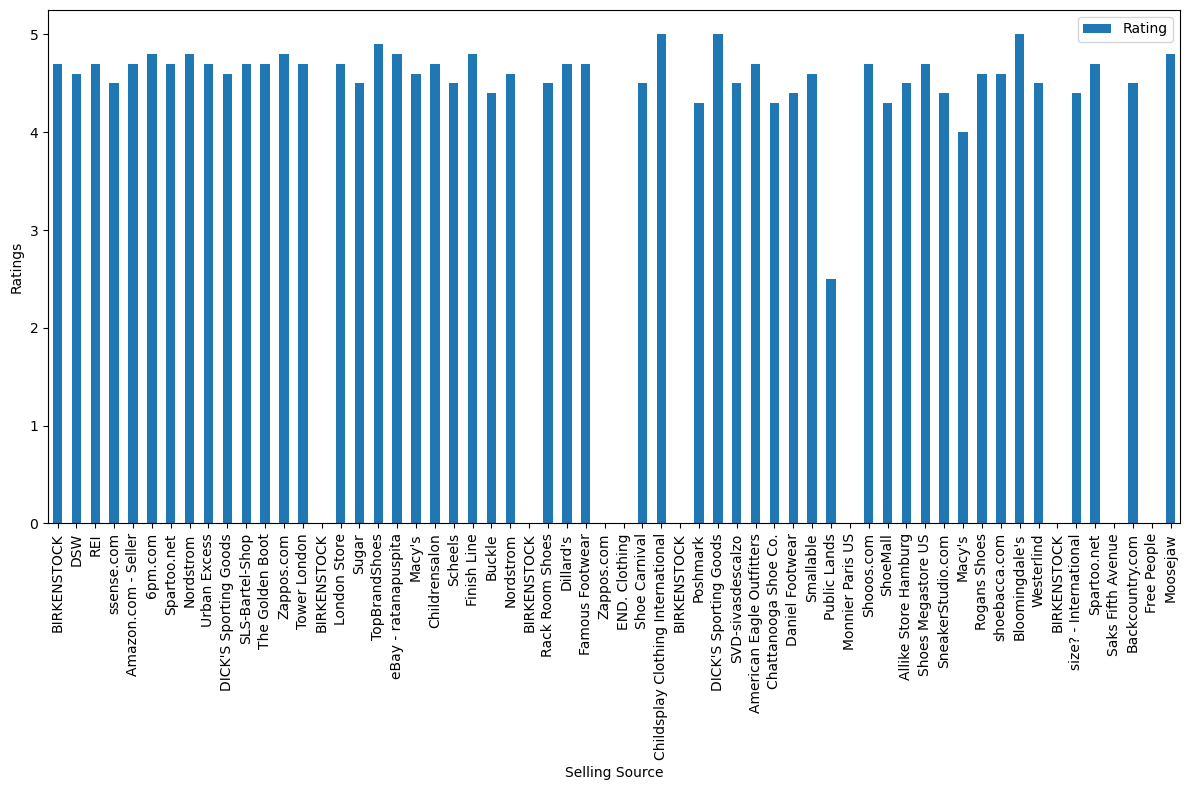

In [47]:
df_rating.plot(kind="bar",rot=90,figsize=(12,8))
plt.ylabel("Ratings")
plt.tight_layout()
plt.savefig("ratingplot.png")
plt.show()

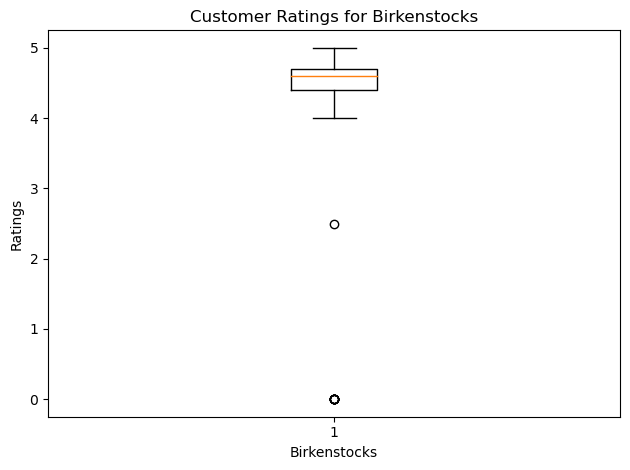

In [67]:
plt.boxplot(df_rating, 0)
plt.title("Customer Ratings for Birkenstocks")
plt.ylabel("Ratings")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkratingboxplot.png")
plt.show()

In [68]:
df_reviews=sub2[["Selling Source","Reviews"]].copy()
df_reviews.set_index("Selling Source", inplace=True)
df_reviews.head()

,Reviews
Selling Source,
BIRKENSTOCK,150
DSW,14115
REI,162
ssense.com,6404
Amazon.com - Seller,9669


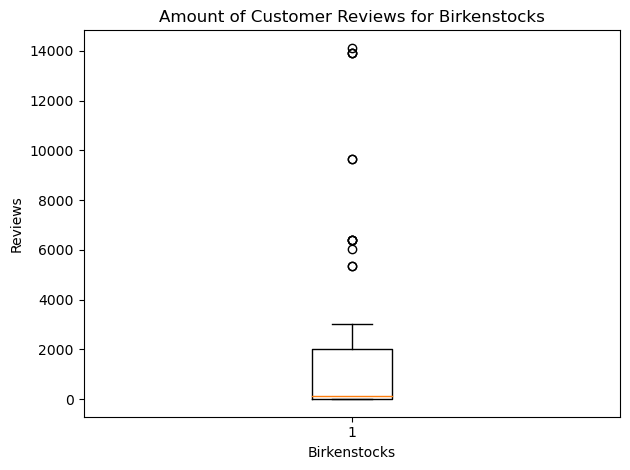

In [69]:
plt.boxplot(df_reviews, 0)
plt.title("Amount of Customer Reviews for Birkenstocks")
plt.ylabel("Reviews")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkreviewsboxplot.png")
plt.show()

In [73]:
df_price=sub2[["Selling Source","Price ($)"]].copy()
df_price.set_index("Selling Source", inplace=True)
df_price.head()

,Price ($)
Selling Source,
BIRKENSTOCK,59.95
DSW,49.99
REI,59.95
ssense.com,190.00
Amazon.com - Seller,72.95


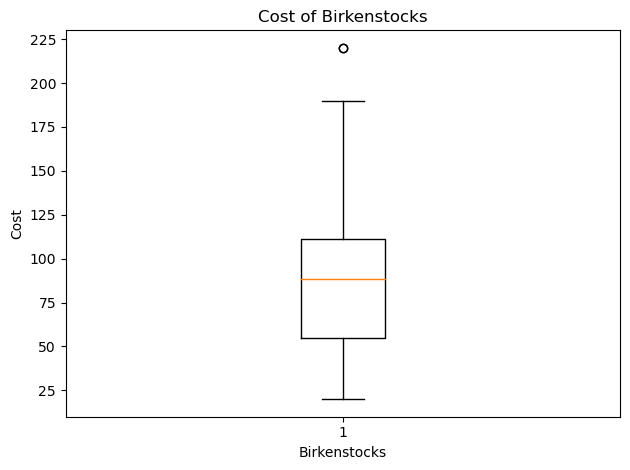

In [74]:
plt.boxplot(df_price, 0)
plt.title("Cost of Birkenstocks")
plt.ylabel("Cost")
plt.xlabel("Birkenstocks")
plt.tight_layout()
plt.savefig("birkcostboxplot.png")
plt.show()